/home/philiptcash1/machineLearning/machineLearningEnv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


best kernel param: {'kernel': 'poly'}
orginal shape:     (1797, 64)
transformed shape: (1797, 12)
score with poly: 0.9888678668348432
score with rbf: 0.9882524939800481
score with linear: 0.9789741237625653


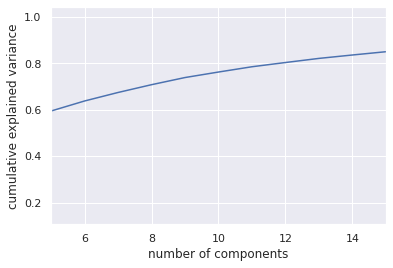

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
#plot_digits(digits.data)

#Displayed cumulative explained variance to find optimal num_of_components
pca = PCA().fit(digits.data)
plt.xlim(5,15)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#tuning hyperparamters; best param is poly
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0, train_size=.9)
svm_kernel = {'kernel': np.array(['linear', 'poly', 'rbf'])}
svm = RandomizedSearchCV(SVC(), svm_kernel)
svm.fit(x_train, y_train)
svm.best_params_
print("best kernel param:", svm.best_params_)


#transoforming dataset with pca to reduce dimensions
pca = PCA(n_components=12)
pca.fit(digits.data)
X_pca = pca.transform(digits.data)
print("orginal shape:    ", digits.data.shape)
print("transformed shape:", X_pca.shape)


#running SVC with 'poly' and 5-split cross_val_score
model = SVC(kernel='poly')
scores = cross_val_score(model, x_train, y_train, cv=5)
print("score with poly:", scores.mean())

#running SVC with "rbf" and 5-split cross_val_score
model = SVC(kernel='rbf')
scores = cross_val_score(model, x_train, y_train, cv=5)
print("score with rbf:", scores.mean())

#running SVC with "linear" and 5-split cross_val_score
model = SVC(kernel='linear')
scores = cross_val_score(model, x_train, y_train, cv=5)
print("score with linear:", scores.mean())